In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import util
from stationUtil import *
from graph import *

len(subway_graph) == len(interval_time) :  True


In [2]:
# LOAD WEIGHTED GRAPH
df = util.loadPickle(util.PATH_INTER_STATION_SPEND_TIME)
subway_graph_index, subway_graph = fn_export_subway_graph(df)
exchange_relation_index = fn_export_exchange_station_index(idx=subway_graph_index)

print(*exchange_relation_index)
subway_graph[(95, 96, False)]

len(subway_graph) == len(interval_time) :  True
(119, 219, True) (123, 305, True) (125, 402, True) (208, 301, True) (219, 119, True) (233, 313, True) (301, 208, True) (305, 123, True) (309, 401, True) (313, 233, True) (401, 309, True) (402, 125, True)


{'stoppingTime': 20, 'time': 180, 'dist': 14}

In [3]:
# Train Operation Start Time
HOUR_TO_SEC = 3600
MIN_TO_SEC = 60

# UNIT is SECEOND
SCHEDULE_START = 6 * HOUR_TO_SEC + 0 * MIN_TO_SEC
SCHEDULE_END = 24 * HOUR_TO_SEC + 59 * MIN_TO_SEC
(SCHEDULE_START,SCHEDULE_END)

(21600, 89940)

In [4]:
# From 04.ipynb
AVERAGE_TRAIN_INTERVAL = np.array([355.9588973127273, 363.9968771614468, 392.5459131354582, 404.6896758014144]).round().astype(np.int32)
AVERAGE_TRAIN_INTERVAL

array([356, 364, 393, 405], dtype=int32)

In [5]:
def line_time_table(graph, line_num: int, EXCLUDE_STATION=[]):
    line_scode_list = line_num_to_range(line_num)
    IS_TRANSFER = False
    IS_END_OF_STATION = [95, 134, 201, 243, 301, 317, 401, 414]

    schedule = []
    for idx, scode in enumerate(line_scode_list):
        if idx == len(line_scode_list) - 1:
            continue
        if scode in IS_END_OF_STATION:
            continue
        move_t = graph[(scode, scode + 1, IS_TRANSFER)]["time"]
        stop_t = graph[(scode, scode + 1, IS_TRANSFER)]["stoppingTime"]
        d = graph[(scode, scode + 1, IS_TRANSFER)]["dist"]
        if schedule == []:
            schedule.append((0 + move_t, 0 + d))
            schedule.append((schedule[-1][0] + stop_t, schedule[-1][1]))
            continue
        if scode in EXCLUDE_STATION:
            schedule.append((schedule[-1][0] + move_t, schedule[-1][1] + d))
            continue
        schedule.append((schedule[-1][0] + move_t, schedule[-1][1] + d))
        schedule.append((schedule[-1][0] + stop_t, schedule[-1][1]))

    return schedule

In [6]:
EXC = [
    109,
    113,
    117,
    121,
    122,
    132,
    100,
    102,
    108,
    114,
    116,
    120,
    133,
    97,
    98,
    99,
    101,
    103,
    104,
    105,
    106,
    107,
    115,
    123,
    124,
    125,
    127,
    128,
    129,
    96,
    126,
    130,
    131,
]

In [7]:
LINE = get_line(EXC[0])
points = line_time_table(subway_graph, LINE)
points_express = line_time_table(subway_graph, LINE, EXCLUDE_STATION=EXC)

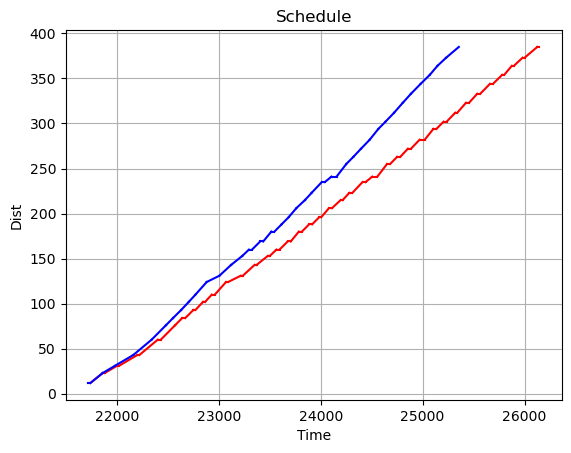

In [8]:
points = np.array(points)
points[:,0] += SCHEDULE_START
# + AVERAGE_TRAIN_INTERVAL[LINE-1]*150
points_express = np.array(points_express)
points_express[:,0] += SCHEDULE_START

# Extract x and y coordinates
x_coords, y_coords = zip(*points)
x_exp, y_exp = zip(*points_express)
# Create a scatter plot
# plt.scatter(x_coords, y_coords, marker='o', color='b', label='Points')

# Connect the points with lines
for i in range(len(points) - 1):
    plt.plot(
        [x_coords[i], x_coords[i + 1]],
        [y_coords[i], y_coords[i + 1]],
        color="r",
        linestyle="-",
    )

for i in range(len(points_express) - 1):
    plt.plot(
        [x_exp[i], x_exp[i + 1]], [y_exp[i], y_exp[i + 1]], color="b", linestyle="-"
    )

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Dist")
plt.title("Schedule")

# Show the plot
plt.grid(True)
# plt.legend()
plt.savefig("test.svg", format="svg")
plt.show()